In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv
/kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv


![](https://popmenucloud.com/nmroecau/b342a178-2c88-4aed-ae94-a5b8b1d4afb9.jpg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [4]:
restaurants_menu = pd.read_csv('/kaggle/input/uber-eats-usa-restaurants-menus/restaurant-menus.csv')
restaurants = pd.read_csv('/kaggle/input/uber-eats-usa-restaurants-menus/restaurants.csv')

In [5]:
restaurants_menu.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [6]:
restaurants.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


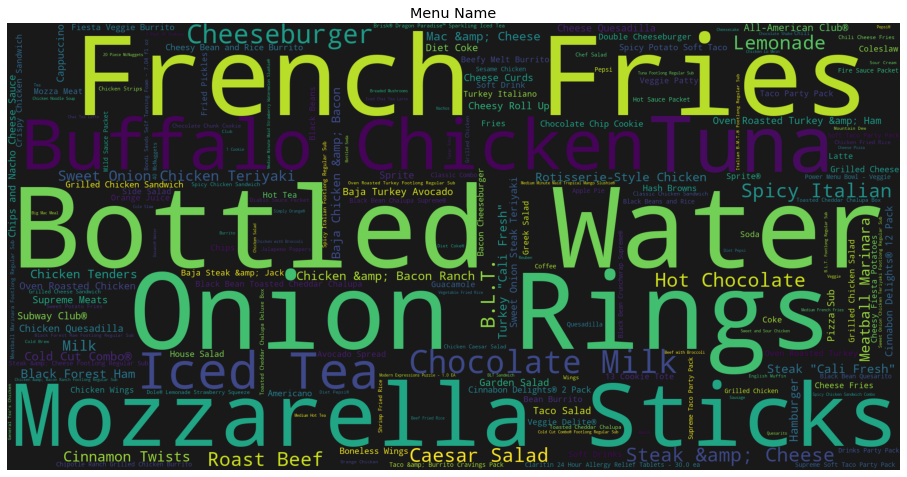

In [7]:
plt.figure(figsize=(16,10))
data = restaurants_menu['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Menu Name')
plt.axis('off')
plt.show()

In [8]:
freefood = restaurants_menu[restaurants_menu.price == '0.0 USD']
paidfood = restaurants_menu[restaurants_menu.price != '0.0 USD']

print("Free Food : ",len(freefood))
print("Paid Food : ",len(paidfood))

Free Food :  23701
Paid Food :  379539


In [9]:
restaurants_menu.head()

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


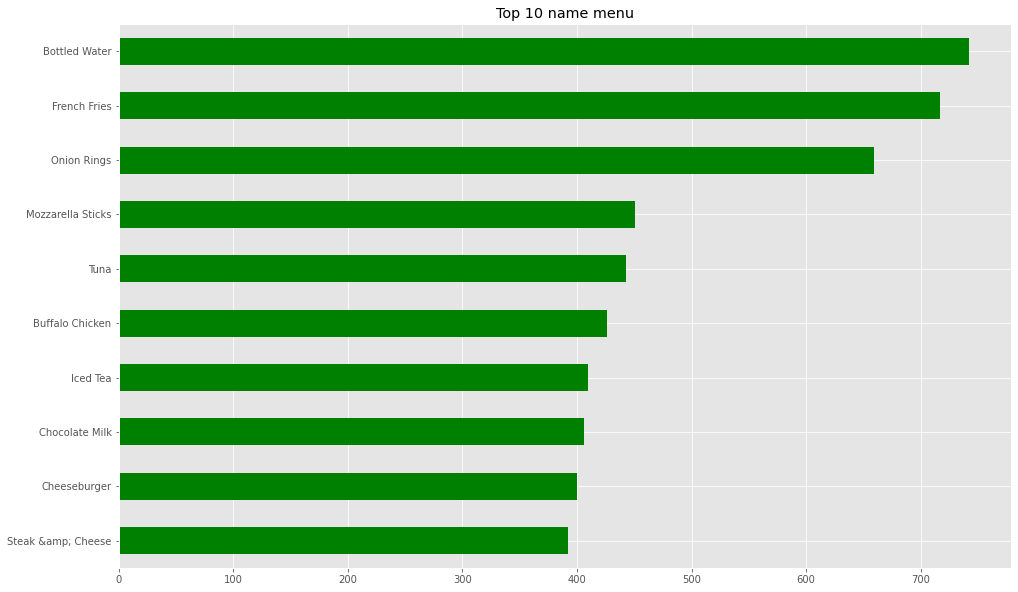

In [10]:
plt.figure(figsize=(16,10))
ax = restaurants_menu['name'].value_counts().iloc[:10].plot(kind="barh", color = 'green')
ax.invert_yaxis()
ax.title.set_text('Top 10 name menu')

In [11]:
restaurant_merge = pd.merge(restaurants, restaurants_menu, left_on='id', right_on='restaurant_id')
restaurant_merge.head()

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,name_y,description,price
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [12]:
bestmenu = restaurant_merge.groupby('name_y').count().sort_values(by = 'id', ascending=False).head(20)
bestmenu

,id,position,name_x,score,ratings,category_x,price_range,full_address,zip_code,lat,lng,restaurant_id,category_y,description,price
name_y,,,,,,,,,,,,,,,
Bottled Water,742,742,742,474,474,742,666,741,741,742,742,742,742,210,742
French Fries,717,717,717,306,306,717,629,712,712,717,717,717,717,228,717
Onion Rings,659,659,659,225,225,659,576,658,658,659,659,659,659,285,659
Mozzarella Sticks,451,451,451,200,200,451,399,451,451,451,451,451,451,331,451
Tuna,443,443,443,138,138,443,440,443,443,443,443,443,443,432,443
Buffalo Chicken,426,426,426,112,112,426,418,425,425,426,426,426,426,424,426
Iced Tea,410,410,410,180,180,409,387,408,408,410,410,410,410,184,410
Chocolate Milk,406,406,406,197,197,406,394,404,404,406,406,406,406,180,406
Cheeseburger,400,400,400,192,192,400,355,394,394,400,400,400,400,260,400


# 🍳 Best Menus

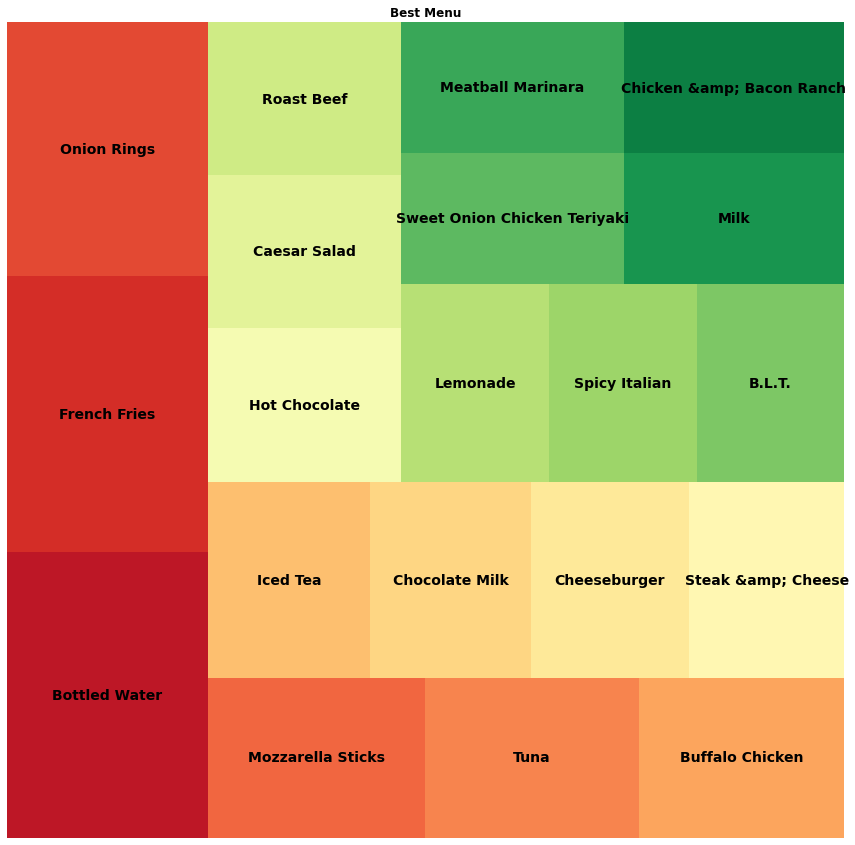

In [13]:
from matplotlib import gridspec

import squarify

y = bestmenu
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.id, label = y.index, color=sns.color_palette("RdYlGn", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Best Menu', position=(0.5, 1.0+0.03), fontsize = 12, fontweight='bold')
plt.axis('off')
plt.show()

In [14]:
restaurants.price_range.unique()

array(['$', nan, '$$', '$$$', '$$$$'], dtype=object)

In [15]:
plt.figure(figsize=(10,6))
print('$ = Inexpensive:',len(restaurants[restaurants.price_range == '$']))
print('$$ = Moderately Expensive:',len(restaurants[restaurants.price_range == '$$']))
print('$$$ = Expensive:',len(restaurants[restaurants.price_range == '$$$']))
print('$$$$ = Very Expensive:',len(restaurants[restaurants.price_range == '$$$$']))

$ = Inexpensive: 2716
$$ = Moderately Expensive: 1690
$$$ = Expensive: 12
$$$$ = Very Expensive: 1


<Figure size 720x432 with 0 Axes>

# 🍲 Restaurant Types

In [16]:
fig = px.pie(restaurants, names='price_range',title='Population of Price Range in Menus', template = 'plotly_dark')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',showlegend=True)

def newLegend(fig, newNames):
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                fig.data[0].labels[i] = newNames[item]
    return(fig)

fig = newLegend(fig = fig, newNames = {'$':'Inexpensive',
                                       '$$' : 'Moderately Expensive',
                                      '$$$' : 'Expensive',
                                      '$$$$' : 'Very Expensive'})


fig.show()

# 🧆 Most Popular Restaurants

In [17]:
popular_restaurant = restaurants.sort_values(['score','ratings'], ascending=False)
popular_restaurant.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
2105,2106,188,Colectivo Prospect,5.0,103.0,"Coffee and Tea, American, Breakfast and Brunch",$,"2211 North Prospect Avenue, Milwaukee, WI, 53202",53202,43.059145,-87.885167
3096,3097,25,Michelangelo's Coffee House,5.0,51.0,"Coffee and Tea, Bakery, Juice and Smoothies, A...",$,"114 State Street, Madison, WI, 53703",53703,43.075016,-89.387200
2511,2512,12,Crumbl Cookies (WI - Oak Creek),5.0,45.0,"Desserts, Coffee and Tea",$,"160 w town square way, oak creek, WI, 53154",53154,42.900540,-87.914760
3140,3141,23,Yummee,5.0,45.0,"American, Desserts, Coffee and Tea",$$,"5510 University Avenue, Madison, WI, 53705",53705,43.083090,-89.475560
964,965,7,"Baskin-Robbins (5000 Whitesburg Dr S, Suite 156)",5.0,42.0,"Desserts, Ice Cream + Frozen Yogurt, Comfort Food",$,"5000 Whitesburg Dr SW, Huntsville, AL, 35802",35802,34.690520,-86.569150


In [18]:
popular_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2105 to 4999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   position      5000 non-null   int64  
 2   name          5000 non-null   object 
 3   score         2169 non-null   float64
 4   ratings       2169 non-null   float64
 5   category      4999 non-null   object 
 6   price_range   4419 non-null   object 
 7   full_address  4978 non-null   object 
 8   zip_code      4978 non-null   object 
 9   lat           5000 non-null   float64
 10  lng           5000 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 468.8+ KB


In [19]:
fig = px.scatter(popular_restaurant, x="score", y="ratings",
     size_max=45, log_x=True, template='plotly_dark')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

[Text(0, 0, 'Colectivo Prospect'),
 Text(1, 0, "Michelangelo's Coffee House"),
 Text(2, 0, 'Crumbl Cookies (WI - Oak Creek)'),
 Text(3, 0, 'Yummee'),
 Text(4, 0, 'Baskin-Robbins (5000 Whitesburg Dr S, Suite 156)'),
 Text(5, 0, 'Poke Poke'),
 Text(6, 0, 'Aloha Poke - Mequon'),
 Text(7, 0, 'Chicken Salad Chick (0183 - Gulf Shores, AL)'),
 Text(8, 0, 'Taste of Sichuan'),
 Text(9, 0, 'Pinkus McBride Market &amp; Deli')]

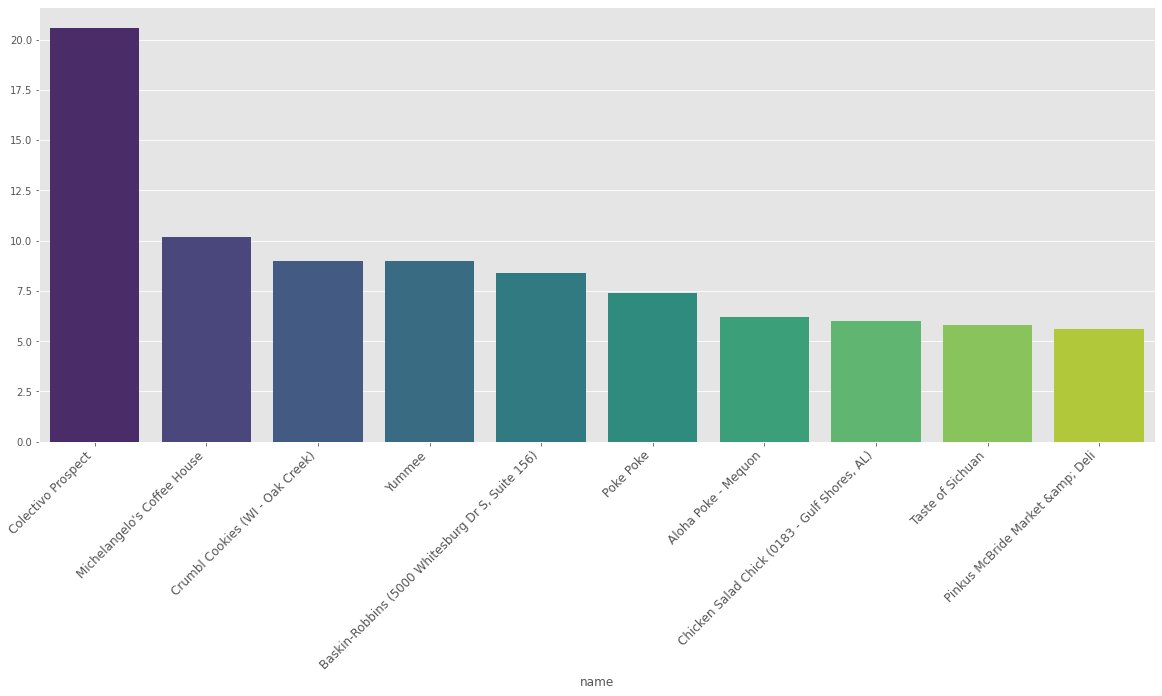

In [20]:
fig = plt.figure(figsize=(20,8))

ax = sns.barplot(popular_restaurant['name'][0:10], (popular_restaurant['ratings']/popular_restaurant['score'])[0:10],palette="viridis")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right",fontsize=12)

In [21]:
restaurants.score.unique()

array([nan, 4.7, 4.6, 5. , 4.9, 3.7, 4.8, 4.3, 4.4, 4.1, 4.5, 4.2, 4. ,
       3.8, 3.9, 3.5, 3.2, 3.6, 3. , 3.4, 3.3, 3.1])

# 🗺️ Heatmap Restaurant By Scores

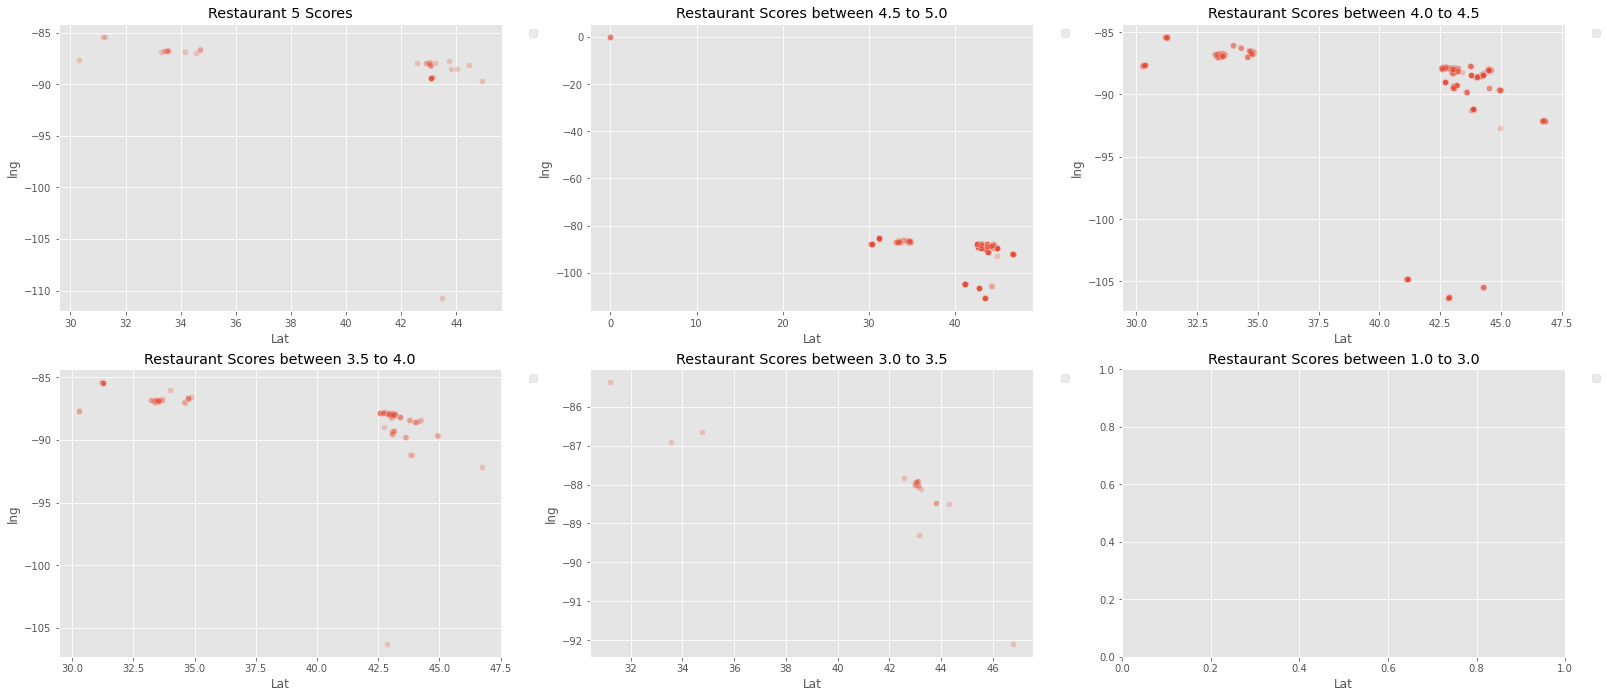

In [22]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant 5 Scores')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[popular_restaurant.score == 5.0], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.5 to 5.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.5) & (popular_restaurant.score < 5.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.0 to 4.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.0) & (popular_restaurant.score < 4.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.5 to 4.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.5) & (popular_restaurant.score < 4.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.0 to 3.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.0) & (popular_restaurant.score < 3.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 1.0 to 3.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 1.0) & (popular_restaurant.score < 3.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# 🗾 Heatmap Restaurants in USA

In [23]:
df_new = popular_restaurant.dropna()

In [24]:
df_new = df_new[(df_new.lat.notnull())]
df_new = df_new[(df_new.lat != -1) & (df_new.lng != -1)]
df_new = df_new[~df_new.lat.isna()]

In [25]:
places = []

map_offenses = folium.Map(location=[37.09024,-95.712891], zoom_start=4.3)
for i, loc in df_new.iterrows():
    places.append((loc['lat'], loc['lng']))

In [26]:
map_offenses.add_children(plugins.HeatMap(places, radius=18))

# 📍 Restaurant Locations

In [27]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(df_new)):
   folium.Marker(
      location=[df_new.iloc[i]['lat'], df_new.iloc[i]['lng']],
      popup=df_new.iloc[i]['full_address'],
   ).add_to(m)

# Show the map again
m

# ⭐ Five Star Restaurants

In [28]:
fivestar=df_new.loc[(df_new['score'] == 5.0)]['full_address'].value_counts()
fivestar

2211 North Prospect Avenue, Milwaukee, WI, 53202                  1
114 State Street, Madison, WI, 53703                              1
3551 Washington Ave Frontage Rd, Sheboygan, WI, 53081             1
90 East Broadway, Jackson, WY, 83001                              1
3230 Ross Clark Circle, Suite 3, Dothan, AL, 36303                1
8201 South Howell Ave, Oak Creek, WI, 53154                       1
2000 Riverchase Galleria, Birmingham, AL, 35244                   1
1879 Cherokee Avenue Sw, Cullman, AL, 35055                       1
1450 Capitol Dr, Pewaukee, USA, Village of Pewaukee, WI, 53072    1
2201 2nd Ave S Suite 105, Birmingham, AL, 35233                   1
7001 Crestwood Blvd, Ste 114, Birmingham, AL, 35213               1
3255 South Oates Street. Suite 8, Dothan, AL, 36301               1
6090 Old Madison Pike NW, Huntsville, AL, 35806                   1
1234 S 108th St, West Allis, WI, 53214                            1
315 W Murdock Ave, Oshkosh, WI, 54901           

In [29]:
# Make an empty map
m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4.2)

# Show the map
m
# add marker one by one on the map
for i in range(0,len(fivestar)):
   folium.Marker(
      location=[df_new.iloc[i]['lat'], df_new.iloc[i]['lng']],
      popup=df_new.iloc[i]['full_address'],
       icon=folium.Icon(color="red", icon="glyphicon-cutlery"),
   ).add_to(m)

# Show the map again
m

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#01c444;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px; color:black; font-weight: bold; font-size : 22px; font-family:Yaro St Regular;">
❤️ Thanks for your time!
        <br>--------------------------------------------------
        <br>
        👍 For my support please upvote this kernel. </p>
</div>